# Experimentación

## Compilado y Preparación

#### Compilamos el código de C++.

In [1]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 10.1.0
-- The CXX compiler identification is GNU 10.1.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc - works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ - works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/fyulita/.virtualenvs/scienv/bin/python (found version "3.8.3") 
-- Found PythonLibs: /usr/lib/libpython3.8.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/fyulita/Documents/UBA/2020-1C/Metodos Numericos/Material/Laboratorio/tp03
-

#### Importamos las librerías necesarias.

In [2]:
import metnum
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

!pwd
!python --version

/home/fyulita/Documents/UBA/2020-1C/Metodos Numericos/Material/Laboratorio/tp03/notebooks
Python 3.8.3


#### Importamos los datos de entrenamiento y test.

In [3]:
train_set = pd.read_csv("../data/train.csv")
display(train_set)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,119879,bonita casas de 2 recamaras a 10 minutos del c...,vendo casa en bosques de ica residencial a 10 ...,Casa,BOSQUES,Zinacantepec,Edo. de México,0.0,2.0,2.0,...,53666.0,NaN,NaN,2015-02-08 00:00:00,0.0,0.0,0.0,0.0,0.0,650000.0
239996,259178,casa en condominio a 10 min. del centro de toluca,"casa con un jardin amplio, un cuarto de servic...",Casa,Filiberto Navas 325,Toluca,Edo. de México,0.0,3.0,3.0,...,51954.0,19.294665,-99.692916,2014-07-10 00:00:00,0.0,0.0,0.0,1.0,1.0,1940000.0
239997,131932,nicolas san juan,"departamento con excelente ubicación, muy cerc...",Apartamento,Nicolas San Juan,Benito Juárez,Distrito Federal,20.0,2.0,1.0,...,50003995.0,NaN,NaN,2015-03-03 00:00:00,0.0,0.0,0.0,0.0,0.0,3400000.0
239998,146867,casa sola. javier rojo gomez.,"casa sola, dividida en cuatro departamentos de...",Casa,Javier Rojo Gomez 120,Iztapalapa,Distrito Federal,20.0,4.0,0.0,...,24162.0,19.366651,-99.082246,2014-12-26 00:00:00,1.0,0.0,0.0,1.0,1.0,2890000.0


In [4]:
list(train_set.columns)

['id',
 'titulo',
 'descripcion',
 'tipodepropiedad',
 'direccion',
 'ciudad',
 'provincia',
 'antiguedad',
 'habitaciones',
 'garages',
 'banos',
 'metroscubiertos',
 'metrostotales',
 'idzona',
 'lat',
 'lng',
 'fecha',
 'gimnasio',
 'usosmultiples',
 'piscina',
 'escuelascercanas',
 'centroscomercialescercanos',
 'precio']

#### Vamos a usar K-Fold Cross Validation para evaluar cuatro distintas métricas en el ajuste: RMSE, RMSLE, \\( R^2 \\) y MAE.

In [5]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score, median_absolute_error

def KFoldCrossValidation(K, X, y):
    # Generamos los splits.
    kfold = KFold(n_splits=K)
    kfold.get_n_splits(X)
    
    rmse = []
    rmsle = []
    r2 = []
    mae = []
    
    for train_index, test_index in kfold.split(X):
        # Dividimos el conjunto de datos.
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Hacemos el ajuste y predecimos.
        linearfit = metnum.LinearRegression()
        linearfit.fit(X_train, y_train)
        y_pred = linearfit.predict(X_test)
        
        # Estos if los agrego porque por algun motivo a veces aparecen precios negativos que tiran error al querer calcular RMSLE.
        if np.any(y_test < 0):
            print("KFold encontró al menos un valor negativo de y_test. En este caso esto no tiene sentido ya que y representa precios, así que tomo el módulo.")
            y_test = np.abs(y_test)
        
        if np.any(y_pred < 0):
            print("KFold encontró al menos un valor negativo de y_pred. En este caso esto no tiene sentido ya que y representa precios, así que tomo el módulo.")
            y_pred = np.abs(y_pred)
        
        # Evaluamos la prediccion con las metricas.
        rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
        rmsle.append(np.sqrt(mean_squared_log_error(y_test, y_pred)))
        r2.append(r2_score(y_test, y_pred))
        mae.append(median_absolute_error(y_test, y_pred))
    
    ans = {
        "rmse": np.asarray(rmse),
        "rmsle": np.asarray(rmsle),
        "r2": np.asarray(r2),
        "mae": np.asarray(mae)
    }
    
    return ans

 ## Caso 1 - Metros Cubiertos vs. Precio

#### Consideremos como caso ajustar el precio en función del tamaño de la casa en metros para 100 casas del conjunto de datos.

In [6]:
# Tomo una muestra de 5000 viviendas del conjunto que tengan todos los campos completos (No queremos ningún "NaN" en los datos) para entrenar y 100 viviendas para testear.
# Todos los datos son del conjunto de train ya que el de test no tiene los precios.
seed = np.random.seed(9)
shuffle = train_set.sample(random_state=seed, frac=1).dropna()
train = shuffle.iloc[:5000, :]
test = shuffle.iloc[5000:5100, :]

x_train, x_test = train["metroscubiertos"].values, test["metroscubiertos"].values
y_train, y_test = train["precio"].values, test["precio"].values

display(train[["id", "metroscubiertos", "precio"]])
display(test[["id", "metroscubiertos", "precio"]])

,id,metroscubiertos,precio
20730,7442,114.0,5300000.0
33962,256581,300.0,4500000.0
79206,148967,138.0,820000.0
95177,31004,80.0,580000.0
205457,101447,145.0,1750000.0
...,...,...,...
184733,226288,136.0,1290000.0
11073,52043,323.0,2790000.0
63152,185106,100.0,495000.0
222922,121992,150.0,1500000.0


,id,metroscubiertos,precio
231792,282516,92.0,1456000.0
70871,73369,111.0,1400000.0
40546,258046,220.0,2105072.0
195028,44683,213.0,7000000.0
133970,278644,258.0,7700000.0
...,...,...,...
24031,160936,130.0,1490000.0
145058,123903,194.0,1895000.0
195392,153037,73.0,1380000.0
52358,69584,100.0,780000.0


count    5000.000000
mean      159.232800
std        86.860951
min        30.000000
25%        88.000000
50%       140.000000
75%       211.000000
max       437.000000
Name: metroscubiertos, dtype: float64

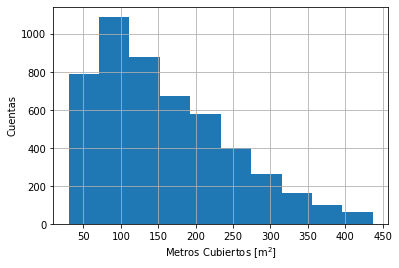

In [7]:
# Veamos un poco de info sobre los metros cubiertos de las viviendas elegidas.
display(train["metroscubiertos"].describe())

ax = train["metroscubiertos"].hist()
plt.xlabel(r"Metros Cubiertos $\left[ \mathrm{m}^2 \right]$")
plt.ylabel("Cuentas")
ax.figure.savefig("Imagenes/Histograma-Metros-Cubiertos.png")
display(ax)

count    5.000000e+03
mean     2.218106e+06
std      1.830148e+06
min      3.100000e+05
25%      8.900000e+05
50%      1.680000e+06
75%      2.982500e+06
max      1.252000e+07
Name: precio, dtype: float64

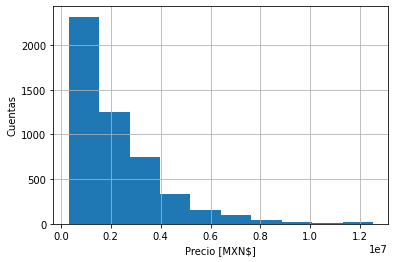

In [8]:
# Veamos un poco de info sobre los precios de las viviendas elegidas.
display(train["precio"].describe())

ax = train["precio"].hist()
plt.xlabel("Precio [MXN$]")
plt.ylabel("Cuentas")
ax.figure.savefig("Imagenes/Histograma-Precio.png")
display(ax)

In [9]:
# Ajustamos.
linearfit = metnum.LinearRegression()
linearfit.fit(x_train, y_train)
y_pred = linearfit.predict(x_test)
y_pred = y_pred.reshape(y_pred.shape[0])

#### Ya hecho el ajuste hagamos un gráfico de los datos y del ajuste hallado para comprobar que el algoritmo funcionó correctamente.

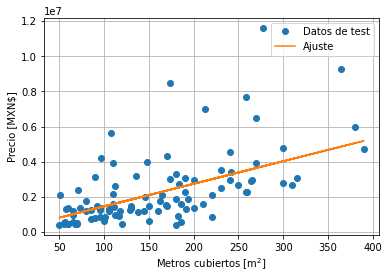

In [10]:
plt.figure("precio-metros-cubiertos")
plt.plot(x_test, y_test, "o", label="Datos de test")
plt.plot(x_test, y_pred, "-", label="Ajuste")
plt.grid()
plt.legend()
plt.xlabel(r"Metros cubiertos [$\mathrm{m}^2$]")
plt.ylabel("Precio [MXN$]")
plt.savefig("Imagenes/Precio-en-Funcion-de-Metros-Cubiertos-con-outliers.png")
plt.show()

#### Notemos que el ajuste parece ser razonable. Veamos las metricas del conjunto de entrenamiento usando KFold.

In [11]:
kfold = KFoldCrossValidation(10, x_train, y_train)
rmse, rmsle, r2, mae = kfold["rmse"], kfold["rmsle"], kfold["r2"], kfold["mae"]

print(f"RMSE = {(np.mean(rmse), np.std(rmse))}")
print(f"RMSLE = {(np.mean(rmsle), np.std(rmsle))}")
print(f"R2 = {(np.mean(r2), np.std(r2))}")
print(f"MAE = {(np.mean(mae), np.std(mae))}")

RMSE = (1451171.6894061335, 45869.85924754486)
RMSLE = (0.5939233573621855, 0.009425886848074088)
R2 = (0.36756000831251445, 0.033837943663398644)
MAE = (642575.5653288205, 29464.309316559)


#### Notemos que el RMSE es muchísimo mayor que el RMSLE. Esto es razonable, ya que el RMSE es del orden del precio de las viviendas (de los millones de pesos) debido a los outliers. Sin embargo, el RMSLE no se ve tan afectado por outliers ya que es esencialmente el logaritmo del error relativo del ajuste; no del error absoluto.

#### Esas métricas son del ajuste con el conjunto de entrenamiento. Veamos las métricas para el ajuste hecho.

In [12]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = median_absolute_error(y_test, y_pred)

print(f"RMSE = {rmse}")
print(f"RMSLE = {rmsle}")
print(f"R2 = {r2}")
print(f"MAE = {mae}")

RMSE = 1622417.1776060958
RMSLE = 0.6147087367191268
R2 = 0.35299630368151724
MAE = 629216.3875649876


#### Notemos que estas métricas son muy similares a lo que obtuvimos de KFold, pero algunos como el RMSE y el R2 no estan dentro del intervalo hallado.

#### Ya que tenemos un ajuste razonblemente bueno para el conjunto de datos, usémoslo para eliminar outliers y mejorar el ajuste. Veamos las distancias (euclidianas) de la predicción a cada punto y borremos todos los puntos cuya distancia sea \\( n \\) sigmas mayor que la promedia.

In [13]:
def removeOutliers(x, y_true, y_pred, n):
    dist = np.abs(y_true - y_pred)
    mean = np.mean(dist)
    std = np.std(dist)
    
    outliers = []
    x_new = []
    y_new = []
    
    for i in range(len(dist)):
        if (dist[i] > mean + n * std):
            outliers.append(x[i])
        else:
            x_new.append(x[i])
            y_new.append(y_true[i])
    
    ans = {
        "outliers": np.asarray(outliers),
        "x": np.asarray(x_new),
        "y": np.asarray(y_new)
    }
    
    return ans

In [14]:
y_pred_train = linearfit.predict(x_train)
y_pred_train = y_pred_train.reshape(y_pred_train.shape[0])

rmOut = removeOutliers(x_train, y_train, y_pred_train, 2)
x_train_new, y_train_new = rmOut["x"], rmOut["y"]
print(rmOut["outliers"].shape)

(232,)


#### Ahora ajustemos con los nuevos datos sin outliers y veamos si el ajuste mejoró.

In [15]:
linearfit_new = metnum.LinearRegression()
linearfit_new.fit(x_train_new, y_train_new)
y_pred_new = linearfit_new.predict(x_test)
y_pred_new = y_pred_new.reshape(y_pred_new.shape[0])

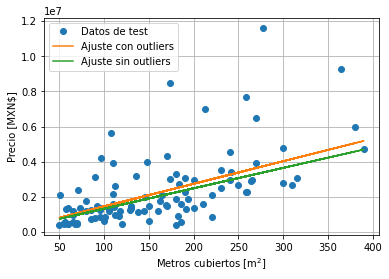

In [16]:
plt.figure("precio-metros-cubiertos-sin-outliers")
plt.plot(x_test, y_test, "o", label="Datos de test")
plt.plot(x_test, y_pred, "-", label="Ajuste con outliers")
plt.plot(x_test, y_pred_new, "-", label="Ajuste sin outliers")
plt.grid()
plt.legend()
plt.xlabel(r"Metros cubiertos [$\mathrm{m}^2$]")
plt.ylabel("Precio [MXN$]")
plt.savefig("Imagenes/Precio-en-Funcion-de-Metros-Cubiertos-sin-outliers.png")
plt.show()

#### Veamos el resultado de las métricas con KFold en el conjunto de entrenamiento.

In [17]:
kfold = KFoldCrossValidation(10, x_train_new, y_train_new)
rmse, rmsle, r2, mae = kfold["rmse"], kfold["rmsle"], kfold["r2"], kfold["mae"]

print(f"RMSE = {(np.mean(rmse), np.std(rmse))}")
print(f"RMSLE = {(np.mean(rmsle), np.std(rmsle))}")
print(f"R2 = {(np.mean(r2), np.std(r2))}")
print(f"MAE = {(np.mean(mae), np.std(mae))}")

RMSE = (985786.6871021006, 27850.867486404575)
RMSLE = (0.5242353292842383, 0.0076200378983040514)
R2 = (0.5004893225165481, 0.0374317558119729)
MAE = (526166.9540724701, 26298.636384232374)


#### Estos errores son notablemente menores que los anteriores. Veamos las métricas del ajuste.

In [18]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_new))
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred_new))
r2 = r2_score(y_test, y_pred_new)
mae = median_absolute_error(y_test, y_pred_new)

print(f"RMSE = {rmse}")
print(f"RMSLE = {rmsle}")
print(f"R2 = {r2}")
print(f"MAE = {mae}")

RMSE = 1662889.3917740753
RMSLE = 0.5987054039511324
R2 = 0.32031385734222817
MAE = 547553.5235634424


#### No mejoraron mucho. Saquemosle los outliers usando el primer fit y fitemos de vuelta.

In [19]:
rmOut = removeOutliers(x_test, y_test, y_pred, 2)
x_test_new, y_test_new = rmOut["x"], rmOut["y"]
print(rmOut["outliers"].shape)

(6,)


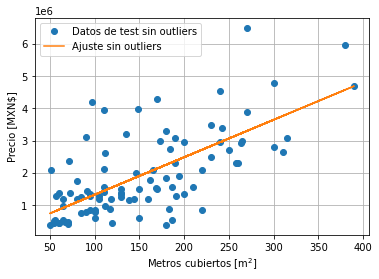

In [20]:
y_pred_new = linearfit_new.predict(x_test_new)
y_pred_new = y_pred_new.reshape(y_pred_new.shape[0])

plt.figure("precio-metros-cubiertos-sin-outliers-2")
plt.plot(x_test_new, y_test_new, "o", label="Datos de test sin outliers")
plt.plot(x_test_new, y_pred_new, "-", label="Ajuste sin outliers")
plt.grid()
plt.legend()
plt.xlabel(r"Metros cubiertos [$\mathrm{m}^2$]")
plt.ylabel("Precio [MXN$]")
plt.savefig("Imagenes/Precio-en-Funcion-de-Metros-Cubiertos-sin-outliers-2.png")
plt.show()

In [21]:
rmse = np.sqrt(mean_squared_error(y_test_new, y_pred_new))
rmsle = np.sqrt(mean_squared_log_error(y_test_new, y_pred_new))
r2 = r2_score(y_test_new, y_pred_new)
mae = median_absolute_error(y_test_new, y_pred_new)

print(f"RMSE = {rmse}")
print(f"RMSLE = {rmsle}")
print(f"R2 = {r2}")
print(f"MAE = {mae}")

RMSE = 962698.6837139453
RMSLE = 0.5482986789369497
R2 = 0.4445750999293281
MAE = 505507.57933999045


#### Estas métricas son mucho mejores que las anteriores e incluso son mejores que las que obtuvimos cuando ajustamos con outliers y predijimos con outliers. Este es el método que vamos a usar de ahora en más.

## Caso 2 - Latitud y Longitud vs. Precio

#### Veamos ahora cómo el precio varía dependiendo de la ubicación de la vivienda. Para eso vamos a usar la latitud y longitud y vamos a ajustar el precio a esas variables.

In [22]:
# Tomo una muestra de 500 viviendas del conjunto que tengan todos los campos completos (No queremos ningún "NaN" en los datos).
# Elijo un seed ya que la imagen de fondo en el grafico esta elegida para cierto rango de latitudes y longitudes.
# El numero 6 lo saque de tirar un dado, te lo juro ;)
seed = np.random.seed(1)
shuffle = train_set.sample(random_state=seed, frac=1).dropna()
train = shuffle.iloc[:10000, :]
test = shuffle.iloc[10000:10500, :]

deberian_ser_nan_train = list(set(train.index[train["lng"] == 0.0].tolist() + train.index[train["lat"] == 0.0].tolist()))
deberian_ser_nan_test = list(set(test.index[test["lng"] == 0.0].tolist() + test.index[test["lat"] == 0.0].tolist()))
train = train.drop(labels=deberian_ser_nan_train, axis=0)
test = test.drop(labels=deberian_ser_nan_test, axis=0)

x_train, x_test = train[["lng", "lat"]].values, test[["lng", "lat"]].values
y_train, y_test = train["precio"].values, test["precio"].values

display(train[["id", "lng", "lat", "precio"]])
display(test[["id", "lng", "lat", "precio"]])

,id,lng,lat,precio
132827,245130,-98.248075,19.044097,2300000.0
131466,260997,-103.336029,20.664742,1000000.0
222654,187401,-104.658465,24.003974,1400000.0
44698,187634,-99.267869,19.489311,3380000.0
229508,271941,-102.294515,21.967961,590000.0
...,...,...,...,...
165684,236002,-99.249526,19.570520,1490000.0
180461,171626,-99.290056,19.358681,3330000.0
103676,186954,-103.302515,20.666569,499000.0
60178,213922,-99.224413,19.336894,3950000.0


,id,lng,lat,precio
104585,23016,-100.886852,22.145986,806000.0
96002,114852,-98.237212,18.954495,449000.0
17554,83688,-103.438111,20.739378,3300000.0
142994,139926,-103.440693,25.576673,620000.0
180841,246245,-100.399864,20.544809,830000.0
...,...,...,...,...
173654,25210,-99.180531,19.391556,6900000.0
218653,27005,-104.671072,23.969891,1700000.0
236795,18990,-99.260156,19.522654,3000000.0
231176,39218,-99.165807,19.416603,1444000.0


In [23]:
print("Rango de Longitud:", (np.min(x_test[:, 0]), np.max(x_test[:, 0])))
print("Rango de Latitud:", (np.min(x_test[:, 1]), np.max(x_test[:, 1])))

Rango de Longitud: (-117.06353060770266, -86.82109659999998)
Rango de Latitud: (16.7376699, 32.54594243826749)


In [24]:
linearfit = metnum.LinearRegression()
linearfit.fit(x_train, y_train)

In [25]:
'''

Creamos una cuadrilla de 1000x1000 valores de latitud y longitud entre el mínimo y el máximo.

Por ejemplo, supongamos que lng = [0, 1, 2] y lat = [0, 1, 2]. Entonces:

LNG = [
    [0, 1, 2],
    [0, 1, 2],
    [0, 1, 2]
]

LAT = [
    [0, 0, 0],
    [1, 1, 1],
    [2, 2, 2]
]

Lo que queremos entonces es usar el ajuste para obtener otra cuadrilla:

y = [
    [f(0, 0), f(1, 0), f(2, 0)],
    [f(0, 1), f(1, 1), f(2, 1)],
    [f(0, 2), f(1, 2), f(2, 2)]
]

donde f(lng, lat) es la función que ajustamos.

'''

lng_graph = np.linspace(np.min(x_test[:, 0]), np.max(x_test[:, 0]), 1000)
lat_graph = np.linspace(np.min(x_test[:, 1]), np.max(x_test[:, 1]), 1000)
LNG_graph, LAT_graph = np.meshgrid(lng_graph, lat_graph)

y_graph = []
for i in range(LNG_graph.shape[0]):
    lng_lat_row = np.column_stack([LNG_graph[i], LAT_graph[i]])
    y_row = linearfit.predict(lng_lat_row)
    y_row = y_row.reshape(y_row.shape[0])
    y_graph.append(y_row)
y_graph = np.asarray(y_graph)

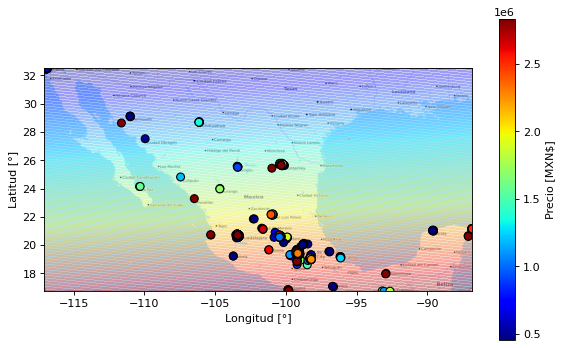

In [26]:
from matplotlib.colors import Normalize

mi = np.min(y_graph)
ma = np.max(y_graph)
norm = Normalize(vmin=mi,vmax=ma)

# El mapa lo saqué de openstreetmap.com.
mexico = plt.imread("Imagenes/mapa_mexico.png")
BBox = (np.min(x_test[:, 0]), np.max(x_test[:, 0]), np.min(x_test[:, 1]), np.max(x_test[:, 1]))

plt.figure("Precio viviendas ubicacion con outliers", figsize=(690 / 80, 425 / 80), dpi=80)
plt.imshow(mexico, extent=BBox, aspect='equal', alpha=1)
plt.contourf(LNG_graph, LAT_graph, y_graph, 200, alpha=0.2, norm=norm, cmap="jet")
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=50, norm=norm, cmap="jet", edgecolor="k")
plt.colorbar().set_label("Precio [MXN$]")
plt.xlabel("Longitud [°]")
plt.ylabel("Latitud [°]")
plt.savefig("Imagenes/Precio-de-Viviendas-por-Ubicacion-con-outliers.png")
plt.show()

#### Notemos que la linealidad del ajuste se refleja en la linealidad del gradiente de colores de fondo que representa la predicción para cada punto del mapa. Según este ajuste las viviendas más caras se encuentran en la costa sur del atlántico. Esta costa es la del caribe, por lo tanto el resultado es razonable. Sin embargo, al ser un ajuste lineal no hay mucha más información que podamos sacar al respecto ya que no puede dividir por zonas.

#### Veamos las métricas.

In [27]:
kfold = KFoldCrossValidation(10, x_train, y_train)
rmse, rmsle, r2, mae = kfold["rmse"], kfold["rmsle"], kfold["r2"], kfold["mae"]

print(f"RMSE = {(np.mean(rmse), np.std(rmse))}")
print(f"RMSLE = {(np.mean(rmsle), np.std(rmsle))}")
print(f"R2 = {(np.mean(r2), np.std(r2))}")
print(f"MAE = {(np.mean(mae), np.std(mae))}")

RMSE = (1785354.618823526, 62240.87080942216)
RMSLE = (0.8259313303491072, 0.015090317447582503)
R2 = (0.04481286925943099, 0.007749381057367552)
MAE = (1088303.1435409365, 24356.060910024797)


In [28]:
y_pred = linearfit.predict(x_test)
y_pred = y_pred.reshape(y_pred.shape[0])

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = median_absolute_error(y_test, y_pred)

print(f"RMSE = {rmse}")
print(f"RMSLE = {rmsle}")
print(f"R2 = {r2}")
print(f"MAE = {mae}")

RMSE = 1898027.9965584935
RMSLE = 0.8344556168185224
R2 = 0.024674740214190805
MAE = 1077706.295796155


#### Ahora saquemos los outliers.

In [29]:
y_pred_train = linearfit.predict(x_train)
y_pred_train = y_pred_train.reshape(y_pred_train.shape[0])

rmOut_train = removeOutliers(x_train, y_train, y_pred_train, 2)
rmOut_test = removeOutliers(x_test, y_test, y_pred, 2)
x_train_new, y_train_new = rmOut_train["x"], rmOut_train["y"]
x_test_new, y_test_new = rmOut_test["x"], rmOut_test["y"]
print(rmOut_train["outliers"].shape)
print(rmOut_test["outliers"].shape)

(455, 2)
(25, 2)


In [30]:
linearfit_new = metnum.LinearRegression()
linearfit_new.fit(x_train_new, y_train_new)

y_graph_new = []
for i in range(LNG_graph.shape[0]):
    lng_lat_row = np.column_stack([LNG_graph[i], LAT_graph[i]])
    y_row = linearfit_new.predict(lng_lat_row)
    y_row = y_row.reshape(y_row.shape[0])
    y_graph_new.append(y_row)
y_graph_new = np.asarray(y_graph_new)

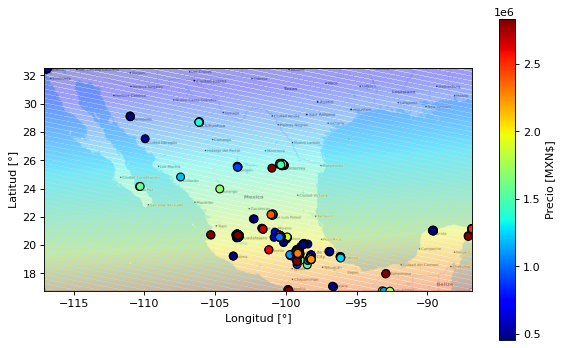

In [31]:
plt.figure("Precio viviendas ubicacion sin outliers", figsize=(690 / 80, 425 / 80), dpi=80)
plt.imshow(mexico, extent=BBox, aspect='equal', alpha=1)
plt.contourf(LNG_graph, LAT_graph, y_graph_new, 200, alpha=0.2, norm=norm, cmap="jet")
plt.scatter(x_test_new[:, 0], x_test_new[:, 1], c=y_test_new, s=50, norm=norm, cmap="jet", edgecolor="k")
plt.colorbar().set_label("Precio [MXN$]")
plt.xlabel("Longitud [°]")
plt.ylabel("Latitud [°]")
plt.savefig("Imagenes/Precio-de-Viviendas-por-Ubicacion-sin-outliers.png")
plt.show()

#### Veamos las métricas.

In [32]:
kfold = KFoldCrossValidation(10, x_train_new, y_train_new)
rmse, rmsle, r2, mae = kfold["rmse"], kfold["rmsle"], kfold["r2"], kfold["mae"]

print(f"RMSE = {(np.mean(rmse), np.std(rmse))}")
print(f"RMSLE = {(np.mean(rmsle), np.std(rmsle))}")
print(f"R2 = {(np.mean(r2), np.std(r2))}")
print(f"MAE = {(np.mean(mae), np.std(mae))}")

RMSE = (1295232.5072680681, 38035.04935887459)
RMSLE = (0.7522037742486681, 0.014787340314579806)
R2 = (0.05716620692816745, 0.009471343697537622)
MAE = (922117.2806457035, 22272.22325827457)


In [33]:
y_pred_new = linearfit_new.predict(x_test_new)
y_pred_new = y_pred_new.reshape(y_pred_new.shape[0])

rmse = np.sqrt(mean_squared_error(y_test_new, y_pred_new))
rmsle = np.sqrt(mean_squared_log_error(y_test_new, y_pred_new))
r2 = r2_score(y_test_new, y_pred_new)
mae = median_absolute_error(y_test_new, y_pred_new)

print(f"RMSE = {rmse}")
print(f"RMSLE = {rmsle}")
print(f"R2 = {r2}")
print(f"MAE = {mae}")

RMSE = 1385242.5421676007
RMSLE = 0.7575707455722046
R2 = 0.053024151299364775
MAE = 912933.6152152426


## Caso 3: Precios de Viviendas en Cancún

#### Estudiemos ahora los precios por ubicación pero segmentando a sólo las viviendas en Cancún y permitámosle al ajuste tomar un orden más de libertad para cada variable.

In [34]:
print("Provincias:", train_set.provincia.unique())

QuintanaRoo = train_set[train_set["provincia"] == "Quintana Roo"]
print("Ciudades de Quintana Roo:", QuintanaRoo.ciudad.unique())

Provincias: ['Distrito Federal' 'Jalisco' 'Edo. de México' 'Oaxaca' 'Quintana Roo'
 'Colima' 'San luis Potosí' 'Nuevo León' 'Querétaro' 'Tamaulipas' 'Puebla'
 'Yucatán' 'Morelos' 'Guerrero' 'Tabasco' 'Guanajuato' 'Hidalgo'
 'Veracruz' 'Chihuahua' 'Aguascalientes' 'Sonora' 'Michoacán'
 'Baja California Norte' 'Baja California Sur' 'Coahuila' 'Durango'
 'Sinaloa' 'Chiapas' 'Nayarit' 'Tlaxcala' 'Campeche' 'Zacatecas' nan]
Ciudades de Quintana Roo: ['Playa del Carmen' 'Cancún' 'Solidaridad' 'Chetumal' 'Bacalar' 'Tulum'
 'Cozumel' 'José María Morelos' 'Othón P. Blanco' nan 'Lázaro Cárdenas'
 'Felipe Carrillo Puerto' 'Isla Mujeres']


In [35]:
cancun = train_set[train_set["ciudad"] == "Cancún"]

In [36]:
# Defino los límites a mano para obtener viviendas en la zona más poblada de Cancún.
outliers = list(set(cancun.index[cancun["lng"] > -86.74].tolist() +
                    cancun.index[cancun["lng"] < -86.92].tolist() +
                    cancun.index[cancun["lat"] > 21.20].tolist() +
                    cancun.index[cancun["lat"] < 21.05].tolist()))
cancun = cancun.drop(labels=outliers, axis=0)
cancun = cancun[["lng", "lat", "precio"]].dropna()
display(cancun)

,lng,lat,precio
23,-86.846323,21.113768,3500000.0
87,-86.870866,21.135203,580000.0
464,-86.875291,21.135806,740000.0
506,-86.829908,21.136486,2350000.0
525,-86.885093,21.139288,580000.0
...,...,...,...
239424,-86.818979,21.177389,1150000.0
239445,-86.838984,21.110805,3500000.0
239571,-86.842353,21.161037,1450000.0
239868,-86.809366,21.180673,3550000.0


In [37]:
seed = np.random.seed(1)
shuffle = cancun.sample(random_state=seed, frac=1)
train = shuffle.iloc[:1800, :]
test = shuffle.iloc[1800:, :]

In [38]:
x_train, x_test = train[["lng", "lat"]].values, test[["lng", "lat"]].values
y_train, y_test = train["precio"].values, test["precio"].values

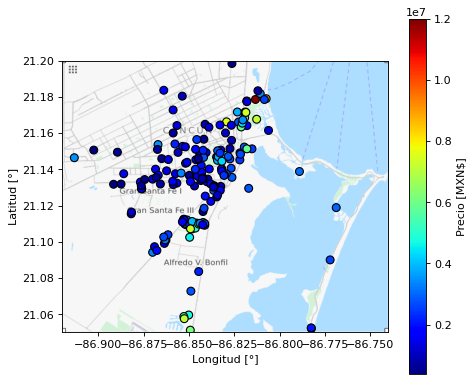

In [39]:
# El mapa lo saqué de openstreetmap.com.
mapa_cancun = plt.imread("Imagenes/mapa_cancun.png")
BBox = (-86.92, -86.74, 21.05, 21.20)

plt.figure("Precio viviendas cancun", figsize=(526 / 80, 470 / 80), dpi=80)
plt.imshow(mapa_cancun, extent=BBox, aspect='equal', alpha=1)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=50, cmap="jet", edgecolor="k")
plt.colorbar().set_label("Precio [MXN$]")
plt.xlabel("Longitud [°]")
plt.ylabel("Latitud [°]")
plt.savefig("Imagenes/Precio-de-Viviendas-de-Cancun.png")
plt.show()

In [40]:
# Agrego lng^2, lng * lat y lat^2 a las variables del ajuste.
x_train = np.column_stack([x_train, x_train[:, 0] ** 2, x_train[:, 0] * x_train[:, 1], x_train[:, 1] ** 2])
x_test = np.column_stack([x_test, x_test[:, 0] ** 2, x_test[:, 0] * x_test[:, 1], x_test[:, 1] ** 2])
print(x_train.shape)
print(x_test.shape)

(1800, 5)
(178, 5)


In [41]:
linearfit = metnum.LinearRegression()
linearfit.fit(x_train, y_train)

lng_graph = np.linspace(-86.92, -86.74, 1000)
lat_graph = np.linspace(21.05, 21.20, 1000)
LNG_graph, LAT_graph = np.meshgrid(lng_graph, lat_graph)

y_graph = []
for i in range(LNG_graph.shape[0]):
    rows = np.column_stack([LNG_graph[i], LAT_graph[i], LNG_graph[i] ** 2, LNG_graph[i] * LAT_graph[i], LAT_graph[i] ** 2])
    y_row = linearfit.predict(rows)
    y_row = y_row.reshape(y_row.shape[0])
    y_graph.append(y_row)
y_graph = np.asarray(y_graph)

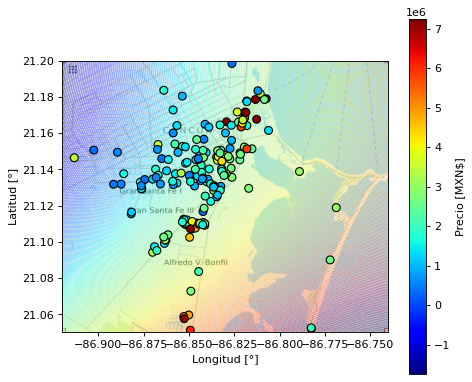

In [42]:
mi = np.min(y_graph)
ma = np.max(y_graph)
norm = Normalize(vmin=mi,vmax=ma)

plt.figure("Precio viviendas cancun con ajuste y con outliers", figsize=(526 / 80, 470 / 80), dpi=80)
plt.imshow(mapa_cancun, extent=BBox, aspect='equal', alpha=1)
plt.contourf(LNG_graph, LAT_graph, y_graph, 200, alpha=0.2, norm=norm, cmap="jet")
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=50, norm=norm, cmap="jet", edgecolor="k")
plt.colorbar().set_label("Precio [MXN$]")
plt.xlabel("Longitud [°]")
plt.ylabel("Latitud [°]")
plt.savefig("Imagenes/Precio-de-Viviendas-en-Cancun-(ConAjusteConOutliers).png")
plt.show()

#### Notemos que como era esperable las viviendas cercanas a la costa son más caras que las alejadas de la costa. Se puede comprobar usando los puntos de la muestra que el ajuste es correcto.

In [43]:
kfold = KFoldCrossValidation(10, x_train, y_train)
rmse, rmsle, r2, mae = kfold["rmse"], kfold["rmsle"], kfold["r2"], kfold["mae"]

print(f"RMSE = {(np.mean(rmse), np.std(rmse))}")
print(f"RMSLE = {(np.mean(rmsle), np.std(rmsle))}")
print(f"R2 = {(np.mean(r2), np.std(r2))}")
print(f"MAE = {(np.mean(mae), np.std(mae))}")

KFold encontró al menos un valor negativo de y_pred. En este caso esto no tiene sentido ya que y representa precios, así que tomo el módulo.
KFold encontró al menos un valor negativo de y_pred. En este caso esto no tiene sentido ya que y representa precios, así que tomo el módulo.
KFold encontró al menos un valor negativo de y_pred. En este caso esto no tiene sentido ya que y representa precios, así que tomo el módulo.
KFold encontró al menos un valor negativo de y_pred. En este caso esto no tiene sentido ya que y representa precios, así que tomo el módulo.
KFold encontró al menos un valor negativo de y_pred. En este caso esto no tiene sentido ya que y representa precios, así que tomo el módulo.
KFold encontró al menos un valor negativo de y_pred. En este caso esto no tiene sentido ya que y representa precios, así que tomo el módulo.
KFold encontró al menos un valor negativo de y_pred. En este caso esto no tiene sentido ya que y representa precios, así que tomo el módulo.
KFold encontr

In [44]:
y_pred = linearfit.predict(x_test)
y_pred = y_pred.reshape(y_pred.shape[0])

if np.any(y_pred < 0):
    print("Por algun motivo se predijo al menos un precio negativo. Tomo módulo ya que esto no tiene sentido.")
    y_pred = np.abs(y_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = median_absolute_error(y_test, y_pred)

print(f"RMSE = {rmse}")
print(f"RMSLE = {rmsle}")
print(f"R2 = {r2}")
print(f"MAE = {mae}")

Por algun motivo se predijo al menos un precio negativo. Tomo módulo ya que esto no tiene sentido.
RMSE = 1703029.4498626206
RMSLE = 0.6704843926712918
R2 = 0.12083383148943594
MAE = 859215.4124069214


#### Ahora saquemos los outliers.

In [45]:
y_pred_train = linearfit.predict(x_train)
y_pred_train = y_pred_train.reshape(y_pred_train.shape[0])

rmOut_train = removeOutliers(x_train, y_train, y_pred_train, 1)
rmOut_test = removeOutliers(x_test, y_test, y_pred, 1)
x_train_new, y_train_new = rmOut_train["x"], rmOut_train["y"]
x_test_new, y_test_new = rmOut_test["x"], rmOut_test["y"]
print(rmOut_train["outliers"].shape)
print(rmOut_test["outliers"].shape)

(196, 5)
(17, 5)


In [46]:
linearfit_new = metnum.LinearRegression()
linearfit_new.fit(x_train_new, y_train_new)

y_graph_new = []
for i in range(LNG_graph.shape[0]):
    rows = np.column_stack([LNG_graph[i], LAT_graph[i], LNG_graph[i] ** 2, LNG_graph[i] * LAT_graph[i], LAT_graph[i] ** 2])
    y_row = linearfit_new.predict(rows)
    y_row = y_row.reshape(y_row.shape[0])
    y_graph_new.append(y_row)
y_graph_new = np.asarray(y_graph_new)

y_pred_new = linearfit_new.predict(x_test_new)

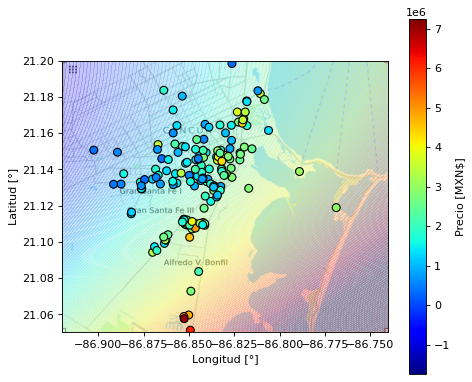

In [47]:
plt.figure("Precio viviendas cancun con ajuste y sin outliers", figsize=(526 / 80, 470 / 80), dpi=80)
plt.imshow(mapa_cancun, extent=BBox, aspect='equal', alpha=1)
plt.contourf(LNG_graph, LAT_graph, y_graph_new, 200, alpha=0.2, norm=norm, cmap="jet")
plt.scatter(x_test_new[:, 0], x_test_new[:, 1], c=y_test_new, s=50, norm=norm, cmap="jet", edgecolor="k")
plt.colorbar().set_label("Precio [MXN$]")
plt.xlabel("Longitud [°]")
plt.ylabel("Latitud [°]")
plt.savefig("Imagenes/Precio-de-Viviendas-en-Cancun-(ConAjusteSinOutliers).png")
plt.show()

In [48]:
kfold = KFoldCrossValidation(10, x_train_new, y_train_new)
rmse, rmsle, r2, mae = kfold["rmse"], kfold["rmsle"], kfold["r2"], kfold["mae"]

print(f"RMSE = {(np.mean(rmse), np.std(rmse))}")
print(f"RMSLE = {(np.mean(rmsle), np.std(rmsle))}")
print(f"R2 = {(np.mean(r2), np.std(r2))}")
print(f"MAE = {(np.mean(mae), np.std(mae))}")

KFold encontró al menos un valor negativo de y_pred. En este caso esto no tiene sentido ya que y representa precios, así que tomo el módulo.
KFold encontró al menos un valor negativo de y_pred. En este caso esto no tiene sentido ya que y representa precios, así que tomo el módulo.
KFold encontró al menos un valor negativo de y_pred. En este caso esto no tiene sentido ya que y representa precios, así que tomo el módulo.
KFold encontró al menos un valor negativo de y_pred. En este caso esto no tiene sentido ya que y representa precios, así que tomo el módulo.
KFold encontró al menos un valor negativo de y_pred. En este caso esto no tiene sentido ya que y representa precios, así que tomo el módulo.
KFold encontró al menos un valor negativo de y_pred. En este caso esto no tiene sentido ya que y representa precios, así que tomo el módulo.
RMSE = (974089.1365683412, 35952.455485467835)
RMSLE = (0.5508931556218956, 0.025957856917994657)
R2 = (0.41029204983900636, 0.03742510330804402)
MAE = (6

In [49]:
if np.any(y_pred_new < 0):
    print("Por algun motivo se predijo al menos un precio negativo. Tomo módulo ya que esto no tiene sentido.")
    y_pred_new = np.abs(y_pred_new)

rmse = np.sqrt(mean_squared_error(y_test_new, y_pred_new))
rmsle = np.sqrt(mean_squared_log_error(y_test_new, y_pred_new))
r2 = r2_score(y_test_new, y_pred_new)
mae = median_absolute_error(y_test_new, y_pred_new)

print(f"RMSE = {rmse}")
print(f"RMSLE = {rmsle}")
print(f"R2 = {r2}")
print(f"MAE = {mae}")

Por algun motivo se predijo al menos un precio negativo. Tomo módulo ya que esto no tiene sentido.
RMSE = 1014339.3879344852
RMSLE = 0.5926114760938469
R2 = 0.3561774499061432
MAE = 646847.1286468506


## Caso 4: Análisis de las descripciones

#### Este caso esta en un notebook aparte, llamado `Metodos_cubiertos.ipynb`.

## Caso 5: Ajuste con muchas variables

In [50]:
cancun = train_set[train_set.ciudad == "Cancún"]

# Defino los límites a mano para obtener viviendas en la zona más poblada de Cancún.
outliers = list(set(cancun.index[cancun["lng"] > -86.74].tolist() +
                    cancun.index[cancun["lng"] < -86.92].tolist() +
                    cancun.index[cancun["lat"] > 21.20].tolist() +
                    cancun.index[cancun["lat"] < 21.05].tolist()))
cancun = cancun.drop(labels=outliers, axis=0)
cancun = cancun[["habitaciones", "garages", "banos", "metroscubiertos", "lat", "lng", "precio"]].dropna()
display(cancun)

,habitaciones,garages,banos,metroscubiertos,lat,lng,precio
23,3.0,2.0,4.0,280.0,21.113768,-86.846323,3500000.0
87,2.0,2.0,1.0,100.0,21.135203,-86.870866,580000.0
506,3.0,2.0,4.0,152.0,21.136486,-86.829908,2350000.0
525,2.0,2.0,1.0,115.0,21.139288,-86.885093,580000.0
946,3.0,2.0,3.0,182.0,21.116581,-86.847453,2390000.0
...,...,...,...,...,...,...,...
239424,3.0,0.0,2.0,150.0,21.177389,-86.818979,1150000.0
239445,3.0,3.0,3.0,330.0,21.110805,-86.838984,3500000.0
239571,3.0,2.0,2.0,150.0,21.161037,-86.842353,1450000.0
239868,2.0,2.0,2.0,114.0,21.180673,-86.809366,3550000.0


In [51]:
np.random.seed(5)
shuffle = cancun.sample(random_state=seed, frac=1)
train = cancun.iloc[:1300, :]
test = cancun.iloc[1300:, :]

display(train)
display(test)

,habitaciones,garages,banos,metroscubiertos,lat,lng,precio
23,3.0,2.0,4.0,280.0,21.113768,-86.846323,3500000.0
87,2.0,2.0,1.0,100.0,21.135203,-86.870866,580000.0
506,3.0,2.0,4.0,152.0,21.136486,-86.829908,2350000.0
525,2.0,2.0,1.0,115.0,21.139288,-86.885093,580000.0
946,3.0,2.0,3.0,182.0,21.116581,-86.847453,2390000.0
...,...,...,...,...,...,...,...
220535,3.0,2.0,1.0,90.0,21.149394,-86.856022,1000000.0
220732,2.0,1.0,1.0,77.0,21.147962,-86.842875,560000.0
220823,3.0,2.0,3.0,260.0,21.148152,-86.826873,2300000.0
221328,3.0,2.0,3.0,110.0,21.116931,-86.883574,990000.0


,habitaciones,garages,banos,metroscubiertos,lat,lng,precio
221884,2.0,0.0,1.0,80.0,21.193232,-86.807097,850000.0
222049,3.0,2.0,3.0,180.0,21.155988,-86.851138,1750000.0
222271,3.0,2.0,2.0,252.0,21.112411,-86.852371,2950000.0
222589,3.0,2.0,3.0,250.0,21.056505,-86.848493,3600000.0
222728,2.0,1.0,2.0,183.0,21.171488,-86.818786,4224000.0
...,...,...,...,...,...,...,...
239424,3.0,0.0,2.0,150.0,21.177389,-86.818979,1150000.0
239445,3.0,3.0,3.0,330.0,21.110805,-86.838984,3500000.0
239571,3.0,2.0,2.0,150.0,21.161037,-86.842353,1450000.0
239868,2.0,2.0,2.0,114.0,21.180673,-86.809366,3550000.0


In [52]:
x_train, x_test = train[["habitaciones", "garages", "banos", "metroscubiertos", "lng", "lat"]].values, test[["habitaciones", "garages", "banos", "metroscubiertos", "lng", "lat"]].values
y_train, y_test = train["precio"].values, test["precio"].values

In [53]:
# Agrego lng^2, lng * lat y lat^2 a las variables del ajuste.
x_train = np.column_stack([x_train, x_train[:, 4] ** 2, x_train[:, 4] * x_train[:, 5], x_train[:, 5] ** 2])
x_test = np.column_stack([x_test, x_test[:, 4] ** 2, x_test[:, 4] * x_test[:, 5], x_test[:, 5] ** 2])
print(x_train.shape)
print(x_test.shape)

(1300, 9)
(116, 9)


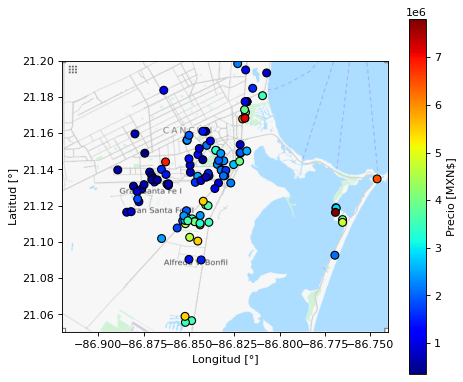

In [54]:
mapa_DF = plt.imread("Imagenes/mapa_cancun.png")
BBox = (-86.92, -86.74, 21.05, 21.20)

plt.figure("Precio viviendas cancun(2)", figsize=(526 / 80, 470 / 80), dpi=80)
plt.imshow(mapa_DF, extent=BBox, aspect='equal', alpha=1)
plt.scatter(x_test[:, 4], x_test[:, 5], c=y_test, s=50, cmap="jet", edgecolor="k")
plt.colorbar().set_label("Precio [MXN$]")
plt.xlabel("Longitud [°]")
plt.ylabel("Latitud [°]")
plt.savefig("Imagenes/Precio-de-Viviendas-de-cancun(2).png")
plt.show()

In [55]:
linearfit = metnum.LinearRegression()
linearfit.fit(x_train, y_train)
y_pred = linearfit.predict(x_test)
y_pred = y_pred.reshape(y_pred.shape[0])

In [56]:
kfold = KFoldCrossValidation(10, x_train, y_train)
rmse, rmsle, r2, mae = kfold["rmse"], kfold["rmsle"], kfold["r2"], kfold["mae"]

print(f"RMSE = {(np.mean(rmse), np.std(rmse))}")
print(f"RMSLE = {(np.mean(rmsle), np.std(rmsle))}")
print(f"R2 = {(np.mean(r2), np.std(r2))}")
print(f"MAE = {(np.mean(mae), np.std(mae))}")

KFold encontró al menos un valor negativo de y_pred. En este caso esto no tiene sentido ya que y representa precios, así que tomo el módulo.
KFold encontró al menos un valor negativo de y_pred. En este caso esto no tiene sentido ya que y representa precios, así que tomo el módulo.
KFold encontró al menos un valor negativo de y_pred. En este caso esto no tiene sentido ya que y representa precios, así que tomo el módulo.
KFold encontró al menos un valor negativo de y_pred. En este caso esto no tiene sentido ya que y representa precios, así que tomo el módulo.
RMSE = (996832.0706240088, 165293.65686291756)
RMSLE = (0.5101565447450431, 0.12474962468777517)
R2 = (0.5742909381827631, 0.10100928829889073)
MAE = (422040.99164390564, 41625.203295236126)


In [57]:
if np.any(y_pred < 0):
    print("Por algun motivo se predijo al menos un precio negativo. Tomo módulo ya que esto no tiene sentido.")
    y_pred = np.abs(y_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = median_absolute_error(y_test, y_pred)

print(f"RMSE = {rmse}")
print(f"RMSLE = {rmsle}")
print(f"R2 = {r2}")
print(f"MAE = {mae}")

RMSE = 1002832.0009571325
RMSLE = 0.4577802230321025
R2 = 0.6306735337240088
MAE = 463180.1208114624


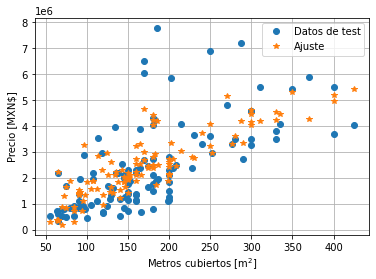

In [58]:
plt.figure("Precio viviendas cancun vs metroscubiertos con ajuste y con outliers")
plt.plot(x_test[:, 3], y_test, "o", label="Datos de test")
plt.plot(x_test[:, 3], y_pred, "*", label="Ajuste")
plt.xlabel(r"Metros cubiertos [$\mathrm{m}^2$]")
plt.ylabel("Precio [MXN$]")
plt.grid()
plt.legend()
plt.savefig("Imagenes/Precio-de-Viviendas-en-cancun-vs-metroscubiertos-(ConAjusteConOutliers).png")
plt.show()

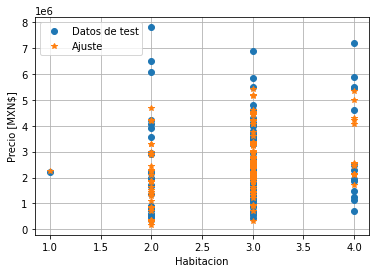

In [59]:
plt.figure("Precio viviendas cancun vs habitaciones con ajuste y con outliers")
plt.plot(x_test[:, 0], y_test, "o", label="Datos de test")
plt.plot(x_test[:, 0], y_pred, "*", label="Ajuste")
plt.xlabel("Habitacion")
plt.ylabel("Precio [MXN$]")
plt.grid()
plt.legend()
plt.savefig("Imagenes/Precio-de-Viviendas-en-cancun-vs-habitaciones-(ConAjusteConOutliers).png")
plt.show()

In [60]:
y_pred_train = linearfit.predict(x_train)
y_pred_train = y_pred_train.reshape(y_pred_train.shape[0])

rmOut_train = removeOutliers(x_train, y_train, y_pred_train, 1)
rmOut_test = removeOutliers(x_test, y_test, y_pred, 1)
x_train_new, x_test_new = rmOut_train["x"], rmOut_test["x"]
y_train_new, y_test_new = rmOut_train["y"], rmOut_test["y"]

print(rmOut_train["outliers"].shape)
print(rmOut_test["outliers"].shape)

(144, 9)
(14, 9)


In [61]:
kfold = KFoldCrossValidation(10, x_train_new, y_train_new)
rmse, rmsle, r2, mae = kfold["rmse"], kfold["rmsle"], kfold["r2"], kfold["mae"]

print(f"RMSE = {(np.mean(rmse), np.std(rmse))}")
print(f"RMSLE = {(np.mean(rmsle), np.std(rmsle))}")
print(f"R2 = {(np.mean(r2), np.std(r2))}")
print(f"MAE = {(np.mean(mae), np.std(mae))}")

KFold encontró al menos un valor negativo de y_pred. En este caso esto no tiene sentido ya que y representa precios, así que tomo el módulo.
KFold encontró al menos un valor negativo de y_pred. En este caso esto no tiene sentido ya que y representa precios, así que tomo el módulo.
KFold encontró al menos un valor negativo de y_pred. En este caso esto no tiene sentido ya que y representa precios, así que tomo el módulo.
KFold encontró al menos un valor negativo de y_pred. En este caso esto no tiene sentido ya que y representa precios, así que tomo el módulo.
KFold encontró al menos un valor negativo de y_pred. En este caso esto no tiene sentido ya que y representa precios, así que tomo el módulo.
KFold encontró al menos un valor negativo de y_pred. En este caso esto no tiene sentido ya que y representa precios, así que tomo el módulo.
KFold encontró al menos un valor negativo de y_pred. En este caso esto no tiene sentido ya que y representa precios, así que tomo el módulo.
RMSE = (55094

In [62]:
linearfit_new = metnum.LinearRegression()
linearfit_new.fit(x_train_new, y_train_new)
y_pred_new = linearfit.predict(x_test_new)
y_pred_new = y_pred_new.reshape(y_pred_new.shape[0])

if np.any(y_pred_new < 0):
    print("Por algun motivo se predijo al menos un precio negativo. Tomo módulo ya que esto no tiene sentido.")
    y_pred_new = np.abs(y_pred_new)

rmse = np.sqrt(mean_squared_error(y_test_new, y_pred_new))
rmsle = np.sqrt(mean_squared_log_error(y_test_new, y_pred_new))
r2 = r2_score(y_test_new, y_pred_new)
mae = median_absolute_error(y_test_new, y_pred_new)

print(f"RMSE = {rmse}")
print(f"RMSLE = {rmsle}")
print(f"R2 = {r2}")
print(f"MAE = {mae}")

RMSE = 600569.7629512287
RMSLE = 0.39754920210809175
R2 = 0.7805742241008684
MAE = 404122.24465560913


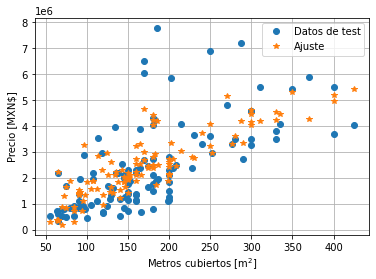

In [63]:
plt.figure("Precio viviendas cancun vs metroscubiertos con ajuste y sin outliers")
plt.plot(x_test[:, 3], y_test, "o", label="Datos de test")
plt.plot(x_test[:, 3], y_pred, "*", label="Ajuste")
plt.xlabel(r"Metros cubiertos [$\mathrm{m}^2$]")
plt.ylabel("Precio [MXN$]")
plt.grid()
plt.legend()
plt.savefig("Imagenes/Precio-de-Viviendas-en-cancun-vs-metroscubiertos-(ConAjusteSinOutliers).png")
plt.show()

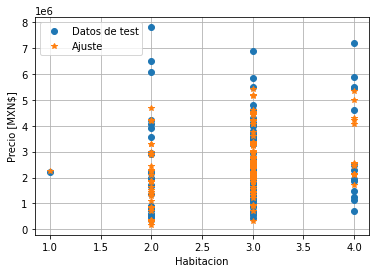

In [64]:
plt.figure("Precio viviendas cancun vs habitaciones con ajuste y sin outliers")
plt.plot(x_test[:, 0], y_test, "o", label="Datos de test")
plt.plot(x_test[:, 0], y_pred, "*", label="Ajuste")
plt.xlabel("Habitacion")
plt.ylabel("Precio [MXN$]")
plt.grid()
plt.legend()
plt.savefig("Imagenes/Precio-de-Viviendas-en-cancun-vs-habitaciones-(ConAjusteSinOutliers).png")
plt.show()